# House Price Prediction - GridSearchCV, Keras

# 1. Theory Review

## 1.1 Search in Machine Learning

What is the search issue in ML?

- Search issue in ML is essentially optimizing ML model, i.e., finding the best model (or function) in the chosen model architecture (or function space) so that performance measure of the selected model on the training dataset (as well as test set) is highest.

## 1.2 Gradient Vector

What is the geometric intuition of gradient vector?

- Gradient vector is the direction in parameter space with highest changing speed/rate of function output.

## 1.3  Gradient Descent variants 

What are the main points to differentiate batch GD  vs. stochastic GD vs. Adam?

- Batch GD: true gradient, computed for whole dataset, hence computationally expensive (bad for big training set) but provides fast convergence. Stochastic GD: a sample approximating the true gradient, computed on a single (random) input, hence computationally very cheap (good for big training set) but noisy update.  Adam: momentum + individual adaptive learning rate, hence usually a better method. 


# 2. Analysis

## Orginal Dataset

https://www.kaggle.com/shree1992/housedata

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this project, I will use Deep Neural Network (DNN) for Regression method to predict house price based on data (size, bedrooms, ...)

Dataset here is the **Ames Housing dataset** including 79 features and 1 label as the house price. However, in this project, dataset is narrowed down to only 10 features.

## Import libraries

In [ ]:
import numpy as np
np.random.seed(1612)
from tensorflow.random import set_seed
set_seed(1612)

## Prepare the dataset

### Read the CSV file

In [ ]:
import pandas as pd

DATA_PATH = '/content/drive/My Drive/Colab Notebooks/AI Practitioner - 2020/Files/s6_houseprice.csv'
df = pd.read_csv(DATA_PATH)
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1462, 11)


In [ ]:
df.head(10) #xem 10 dòng đầu tiên của dataframe 

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
0,8450.0,7.0,5.0,856.0,2.0,1.0,3.0,8.0,0.0,548.0,208500.0
1,9600.0,6.0,8.0,1262.0,2.0,0.0,3.0,6.0,1.0,460.0,181500.0
2,11250.0,7.0,5.0,920.0,2.0,1.0,3.0,6.0,1.0,608.0,223500.0
3,9550.0,7.0,5.0,756.0,1.0,0.0,3.0,7.0,1.0,642.0,140000.0
4,14260.0,8.0,5.0,1145.0,2.0,1.0,4.0,9.0,1.0,836.0,250000.0
5,14115.0,5.0,5.0,796.0,1.0,1.0,1.0,5.0,0.0,480.0,143000.0
6,10084.0,8.0,5.0,1686.0,2.0,0.0,3.0,7.0,1.0,636.0,307000.0
7,10382.0,7.0,6.0,1107.0,2.0,1.0,3.0,7.0,2.0,484.0,200000.0
8,6120.0,7.0,5.0,952.0,2.0,0.0,2.0,8.0,2.0,468.0,129900.0
9,7420.0,5.0,6.0,991.0,1.0,0.0,2.0,5.0,2.0,205.0,118000.0


### Check NULL

Check if all columns has Null or NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   OverallCond   1460 non-null   float64
 3   TotalBsmtSF   1460 non-null   float64
 4   FullBath      1460 non-null   float64
 5   HalfBath      1460 non-null   float64
 6   BedroomAbvGr  1460 non-null   float64
 7   TotRmsAbvGrd  1460 non-null   float64
 8   Fireplaces    1460 non-null   float64
 9   GarageArea    1460 non-null   float64
 10  SalePrice     1460 non-null   float64
dtypes: float64(11)
memory usage: 125.8 KB


In [ ]:
df.isna().sum() # check the number of null (na - Not available)

LotArea         2
OverallQual     2
OverallCond     2
TotalBsmtSF     2
FullBath        2
HalfBath        2
BedroomAbvGr    2
TotRmsAbvGrd    2
Fireplaces      2
GarageArea      2
SalePrice       2
dtype: int64

Remove all null or NaN values

In [ ]:
df = df.dropna()

Check again if all Null or Nan values are gone

In [ ]:
df.isna().sum() # check the number of null (na - Not available)

LotArea         0
OverallQual     0
OverallCond     0
TotalBsmtSF     0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
SalePrice       0
dtype: int64

### Statistical report of the dataset (Generate descriptive statistics)

In [ ]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,180921.195890
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,79442.502883
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,129975.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,163000.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,214000.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,755000.000000


## Split the dataset into Train and Test sets

Split the dataset into X, y

Since the dataset contains only numerical values, I will use the function `.values` to transform it into numpy array

In [ ]:
np_data = df.values
print('np_data: ', np_data)
print('np_data shape: ', np_data.shape)
X = np_data[:, :10]
print('X: ', X)
y = np_data[:,-1]
print('y: ', y)

np_data:  [[8.45000e+03 7.00000e+00 5.00000e+00 ... 0.00000e+00 5.48000e+02
  2.08500e+05]
 [9.60000e+03 6.00000e+00 8.00000e+00 ... 1.00000e+00 4.60000e+02
  1.81500e+05]
 [1.12500e+04 7.00000e+00 5.00000e+00 ... 1.00000e+00 6.08000e+02
  2.23500e+05]
 ...
 [9.04200e+03 7.00000e+00 9.00000e+00 ... 2.00000e+00 2.52000e+02
  2.66500e+05]
 [9.71700e+03 5.00000e+00 6.00000e+00 ... 0.00000e+00 2.40000e+02
  1.42125e+05]
 [9.93700e+03 5.00000e+00 6.00000e+00 ... 0.00000e+00 2.76000e+02
  1.47500e+05]]
np_data shape:  (1460, 11)
X:  [[8.450e+03 7.000e+00 5.000e+00 ... 8.000e+00 0.000e+00 5.480e+02]
 [9.600e+03 6.000e+00 8.000e+00 ... 6.000e+00 1.000e+00 4.600e+02]
 [1.125e+04 7.000e+00 5.000e+00 ... 6.000e+00 1.000e+00 6.080e+02]
 ...
 [9.042e+03 7.000e+00 9.000e+00 ... 9.000e+00 2.000e+00 2.520e+02]
 [9.717e+03 5.000e+00 6.000e+00 ... 5.000e+00 0.000e+00 2.400e+02]
 [9.937e+03 5.000e+00 6.000e+00 ... 6.000e+00 0.000e+00 2.760e+02]]
y:  [208500. 181500. 223500. ... 266500. 142125. 147500.]


In [ ]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Split the X, y dataset into Train, Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

Shape of X train (1168, 10)
Shape of y train (1168,)
Shape of X test (292, 10)
Shape of y test (292,)


## Scaling

As X, ybelongs to different ranges. in this project, I will apply Scaling to both X and y.

Reference of Scaler types: [here](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02). So I can use any type of Scaler to apply to.

In [ ]:
# 1. Choose any type of Scaler
# 2. Create 2 Scale variables, name after x_scale and y_scale
# 3. Proceed scaling on X_train, X_test and y_train, y_test

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_scale = StandardScaler()
X_train_scaled = x_scale.fit_transform(X_train)
X_test_scaled = x_scale.transform(X_test)
print('X_train_scaled shape: ', X_train_scaled.shape)
print('X_test_scaled shape: ', X_test_scaled.shape)

y_scale = StandardScaler()
y_train_scaled = y_scale.fit_transform(y_train)
y_test_scaled = y_scale.transform(y_test)
print('y_train_scaled shape: ', y_train_scaled.shape)
print('y_test_scaled shape: ', y_test_scaled.shape)

y_train shape:  (1168, 1)
y_test shape:  (292, 1)
X_train_scaled shape:  (1168, 10)
X_test_scaled shape:  (292, 10)
y_train_scaled shape:  (1168, 1)
y_test_scaled shape:  (292, 1)


## Create a Deep Neural Network model

## Keras review

**Initialize optimizer**

Compile a model



```
model.compile(loss='', optimizer='adam', metrics=''
```

When compiling the model as above, optimizer will use the default learning rate of the system. To input the learning rate on my will, I will initialize the optimizer.

```
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, ...

my_optimizer = Adam(learning_rate = 0.01)
# hoặc
my_optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
# hoặc
my_optimizer = RMSprop(learning_rate = 0.01, momentum = 0.9)

model.compile(loss='', optimizer=my_optimizer, metrics='')
```

Some common learning_rate: 0.1 or 0.001 or 0.001.

Som common mentum: 0.9 or 0.8.




**Khởi tạo model**

There are 2 ways to initialize the model in Keras

* Method 1: use Sequential

```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X.shape[1:]))
...
model.add(Dense(1, activation='sigmoid'))
```


*   Method 2: use Model

```
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

input = Input(shape=X.shape[1:])
layer_1 = Dense(16, activation='relu')(input)
layer_2 = Dense(16, activation='relu')(layer_1)
layer_3 = Dense(16, activation='relu')(layer_2)
output = Dense(1, activation='sigmoid')(layer_3)

model=Model(input, output)

```





**Metrics for Regression**





*  If it is a Regression case, output layer will have the following type

```
model = Sequential()
...
model.add(Dense(1, activation='linear'))
```

*  Common metrics in the Regression include MAE, MSE, RMSE. To combine multiple metrics, I will code as follows:

```
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss='mse', optimizer='', metrics=['mae',RootMeanSquaredError()])
```










Reference: RMSE vs MAE [here](https://thedatascientist.com/performance-measures-rmse-mae/)


**Plotting**



Plot after training the model



```
model.compile(loss='mse', optimizer='', metrics=['mae',RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=50)
```

Now, onkect history will save 3 metrics 'loss',  'mae'   'root_mean_squared_error' after 50 epochs

To see those metrics, I will use the command

```
print(history.history.keys())
```

To plot a chart for loss after 50 epochs, I will use the command

```
plt.plot(history.history['loss']) # loss is one of metrics returned after calling the above function print()
```

## Combine SkLearn's GridSearchCV with Keras

**Note**

The below code is for reference only. I will need to modify and combine the below code to my project.

To combine GridSearchCV from SkLearn with Keras, I will import these libraries.

In [ ]:
from sklearn.model_selection import GridSearchCV
# As this is a Regression cas, I will use KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

I will write a function create_model() to create a Keras model 

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import RootMeanSquaredError

def create_model(optimizer='adam', learning_rate=0.1, momentum=0.9):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))
  my_optim=None
  if optimizer == 'adam':
    # if optimizer is adam, there will be no learning_rate
    my_optim = Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    my_optim = SGD(learning_rate=learning_rate, momentum=momentum)
  elif optimizer == 'rmsprop':
    my_optim = RMSprop(learning_rate=learning_rate, momentum=momentum)
  
  model.compile(loss='mse', optimizer=my_optim, metrics=['mae',RootMeanSquaredError()])
  return model


Next, I will create a dictionary containing metrics to be searched.

In [ ]:
# Define the grid search parameters
optimizer_values = ['adam', 'sgd', 'rmsprop']
lr_values = [0.001, 0.005, 0.01, 0.05, 0.1]
momentum_values = [0.0, 0.6, 0.8, 0.9]

param_grid = {
    'optimizer': optimizer_values,
    'learning_rate': lr_values,
    'momentum': momentum_values
}

Initialize the model by KerasRegressor

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=80, verbose=1)

Create GridSearchCV and fit the model on X_train, y_train

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best model using: %s" % (grid_result.best_params_))

Get the best model

In [ ]:
best_model = grid_result.best_estimator_

Evaluate the performance on Test Set

In [ ]:
best_model.model.evaluate(X_test, y_test)

In [ ]:
best_model.model.evaluate(X_test_scaled, y_test_scaled) # as it it scaled so I should use this command instead of the above one

As I have used GridSearchCV, I will not be able to plot the loss function after epochs.

## Implement a Deep Neural Network

I will now implement 1 Deep Neural Network (DNN) to sove the case of predicting house price

### Goal

* Use methods of scaling, optimizer, learning)rate, model architecture
* **Apply GridSearchCV in Koeras to find the best optimizer, learning_rate, momentum**
* **After training the model, I will evaluate the performance on Test set**

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, Flatten
# Regression: use KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
# ===========================================
# Case 1: learning_rate=0.01, momentum=0.9
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

def create_model(optimizer='sgd', learning_rate=0.01, momentum=0.9):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='linear'))
  # model.add(Dense(8, activation='relu', input_shape=X_train.shape[1:]))
  # model.add(Dense(1, activation='linear'))
  my_optim=None
  if optimizer == 'adam':
    # if using optimizer as adam, there will be no learning_rate
    my_optim = Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    my_optim = SGD(learning_rate=learning_rate, momentum=momentum)
  elif optimizer == 'rmsprop':
    my_optim = RMSprop(learning_rate=learning_rate, momentum=momentum)
  
  model.compile(loss='mse', optimizer=my_optim, metrics=['mae',RootMeanSquaredError()])
  return model

In [ ]:
# Define the grid search parameters
optimizer_values = ['adam', 'sgd', 'rmsprop']
lr_values = [0.01, 0.1]
momentum_values = [0.0, 0.9]

param_grid = {
    'optimizer': optimizer_values,
    'learning_rate': lr_values,
    'momentum': momentum_values
}

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=80, verbose=1)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)
print("Best model using: %s" % (grid_result.best_params_))

Epoch 1/80
37/37 [==============================] - 0s 1ms/step - loss: 0.6865 - mae: 0.5725 - root_mean_squared_error: 0.8286
Epoch 2/80
37/37 [==============================] - 0s 1ms/step - loss: 0.2810 - mae: 0.3369 - root_mean_squared_error: 0.5301
Epoch 3/80
37/37 [==============================] - 0s 1ms/step - loss: 0.2364 - mae: 0.3034 - root_mean_squared_error: 0.4862
Epoch 4/80
37/37 [==============================] - 0s 1ms/step - loss: 0.2248 - mae: 0.2896 - root_mean_squared_error: 0.4742
Epoch 5/80
37/37 [==============================] - 0s 1ms/step - loss: 0.2095 - mae: 0.2798 - root_mean_squared_error: 0.4577
Epoch 6/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1992 - mae: 0.2747 - root_mean_squared_error: 0.4463
Epoch 7/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1849 - mae: 0.2675 - root_mean_squared_error: 0.4300
Epoch 8/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1815 - mae: 0.2674 - root_mean_square

In [ ]:
best_model = grid_result.best_estimator_

In [ ]:
best_model.model.evaluate(X_test_scaled, y_test_scaled)

10/10 [==============================] - 0s 1ms/step - loss: 0.1051 - mae: 0.2344 - root_mean_squared_error: 0.3241


[0.1050662025809288, 0.23435331881046295, 0.32413917779922485]

## Compare MAE of y_test_scaled and y_pred_inverse

Metrics are to evaluate the model performance but how much metrics should be depends on which I would like to define

In [ ]:
y_pred = best_model.predict(X_test_scaled)
y_pred_inverse = y_scale.inverse_transform(y_pred) # after scaling, I have to inverse_transform to see the real house price

from tensorflow.keras.metrics import MeanAbsoluteError
mae = MeanAbsoluteError()
print(mae(y_test_scaled, y_pred_inverse))

10/10 [==============================] - 0s 1ms/step
tf.Tensor(186325.62, shape=(), dtype=float32)


## Compare RMSE of y_test_scaled and y_pred_inverse

In [ ]:
from tensorflow.keras.metrics import MeanSquaredError
import math
mse = MeanSquaredError()
print(math.sqrt(mse(y_test_scaled, y_pred_inverse)))

200358.04878267305


## Conclusion

The predicted MAE on the Test set is $186,325.62.

The MAE on the scaled Test set is 0.2344.

The real MAE is $184,885.94.

As the Test set has 292 patterns, the MAE of them is $186,325.62 * 292 = $52,406,900.

The RMSE of them is $200,358.05 * 292 = $58,504,536.

As I have used GridSearch to find the best model (optimizers, learning rate,...), I can not return its history plot. Only if I test the previous mode, I can plot the history then.

Epoch 1/80
37/37 [==============================] - 0s 2ms/step - loss: 0.5246 - mae: 0.4610 - root_mean_squared_error: 0.7243
Epoch 2/80
37/37 [==============================] - 0s 1ms/step - loss: 0.2562 - mae: 0.3084 - root_mean_squared_error: 0.5061
Epoch 3/80
37/37 [==============================] - 0s 2ms/step - loss: 0.2233 - mae: 0.2905 - root_mean_squared_error: 0.4725
Epoch 4/80
37/37 [==============================] - 0s 2ms/step - loss: 0.2130 - mae: 0.2813 - root_mean_squared_error: 0.4616
Epoch 5/80
37/37 [==============================] - 0s 2ms/step - loss: 0.1983 - mae: 0.2735 - root_mean_squared_error: 0.4453
Epoch 6/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1881 - mae: 0.2697 - root_mean_squared_error: 0.4337
Epoch 7/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1760 - mae: 0.2641 - root_mean_squared_error: 0.4195
Epoch 8/80
37/37 [==============================] - 0s 1ms/step - loss: 0.1723 - mae: 0.2630 - root_mean_square

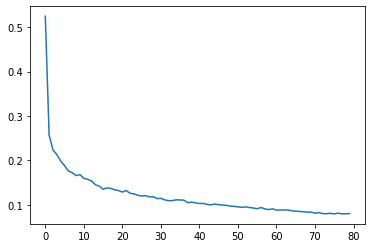

In [ ]:
# Test the previous model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
my_optim=SGD(learning_rate = 0.01, momentum = 0.0)
model.compile(loss='mse', optimizer=my_optim, metrics=['mae',RootMeanSquaredError()])
history = model.fit(X_train_scaled, y_train_scaled, epochs=80)
print(history.history.keys())
plt.plot(history.history['loss']) 

As per the plot (x: epochs, y: loss), it has reached the max limit. Even if I keep training it, it will be quite the same for loss, mae and mse.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'root_mean_squared_error'])


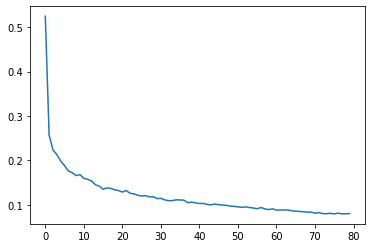

In [ ]:
# plt.plot(history.history['loss'])